In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 


# Read data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/train_hw1.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# print shape
print('Data Dimensionality: ' , end = "")
print(df.shape)


# print the summary for each column
print('Data Summary: ')
print(df.describe())



# print first 5 rows in your dataset
print('Head of Data: ')
df.head(5)





Data Dimensionality: (6650, 11)
Data Summary: 
               Age       Balance      Vintage  Transaction_Status  \
count  6650.000000  6.650000e+03  6650.000000         6650.000000   
mean     41.130226  8.045954e+05     2.250226            0.515789   
std       9.685747  5.157549e+05     1.458795            0.499788   
min      21.000000  6.300000e+01     0.000000            0.000000   
25%      34.000000  3.922642e+05     1.000000            0.000000   
50%      40.000000  7.649386e+05     2.000000            1.000000   
75%      47.000000  1.147124e+06     3.000000            1.000000   
max      72.000000  2.436616e+06     5.000000            1.000000   

       Credit_Card     Is_Churn  
count  6650.000000  6650.000000  
mean      0.664361     0.231128  
std       0.472249     0.421586  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       1.000000     1.000000  
Head of Data: 


,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:

df = pd.read_csv("/content/drive/MyDrive/CS 412/train_hw1.csv")
# Drop ID column:
df = df.drop(columns=['ID'])

# Define X:
X = df.drop(columns=[ 'Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category'])

# Define y:
y = df.drop(columns=['Is_Churn'])


In [ ]:
from sklearn.model_selection import train_test_split

# Split 80-20
x_train, x_test, y_train, y_test = train_test_split(y, X , test_size = 0.20 , train_size = 0.80 ,shuffle = True)






In [ ]:
gender_map = {'Female':1, 'Male': 0}

Income_map = {'Less than 5L': 1, 
              '5L - 10L': 2,
              '10L - 15L': 3,
              'More than 15L': 4}
              
Credit_Category_map = {'Poor': 1,
                       'Average': 2,
                       'Good': 3}

Product_Holdings_map = {'3+': 3}

# You can use replace method to replace the values on training and test sets:
ds = [x_train, x_test]
for i in ds:
  i['Gender'].replace(gender_map,inplace=True)
  i['Income'].replace(Income_map,inplace=True)
  i['Credit_Category'].replace(Credit_Category_map,inplace=True)
  i['Product_Holdings'].replace(Product_Holdings_map,inplace=True)





In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import  cross_val_score


tree_para = {'max_depth':[3, 5, 7, 9, 11]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)

acc=accuracy_score(y_train, y_pred)
print(acc)

0.7738721804511278


Score 0.7738721804511278
best pams {'max_depth': 3}


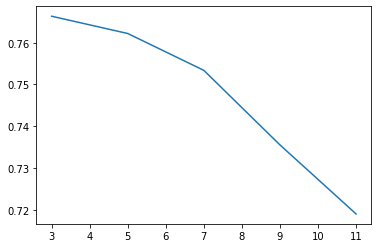

In [ ]:
import matplotlib.pyplot as plt

print("Score",clf.score(x_train, y_train))

print("best pams",clf.best_params_)
plt.plot(tree_para['max_depth'],clf.cv_results_['mean_test_score'])

In [ ]:
# test prediction using a decision tree with all default parameters and ..... min-split value 




# Report your accuracy
from sklearn.metrics import accuracy_score # you can find your scoring metric in this library

y_pred = clf.predict(x_test)

# Report your accuracy
from sklearn.metrics import accuracy_score # you can find your scoring metric in this library
acc = accuracy_score(y_test, y_pred)

print("accuracy: ", acc)


accuracy:  0.7556390977443609
